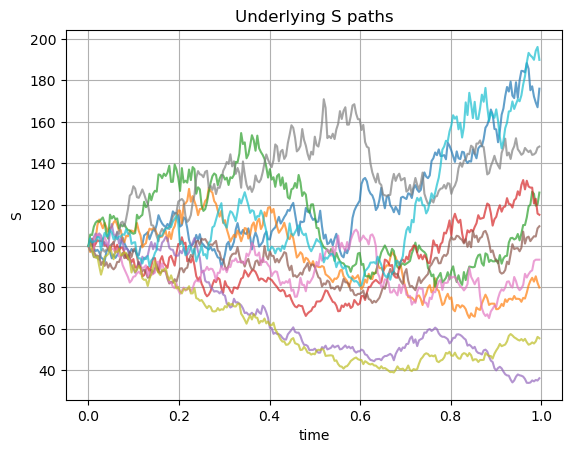

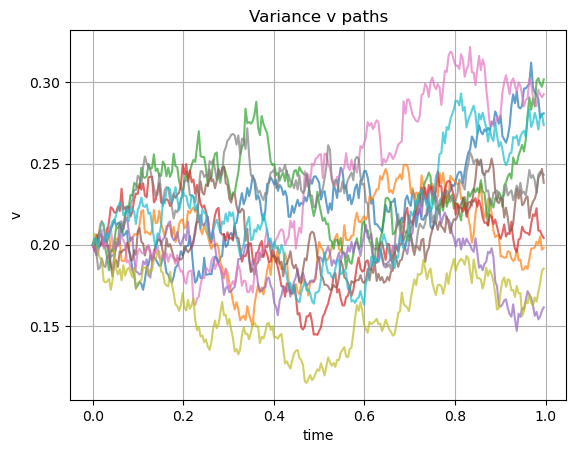

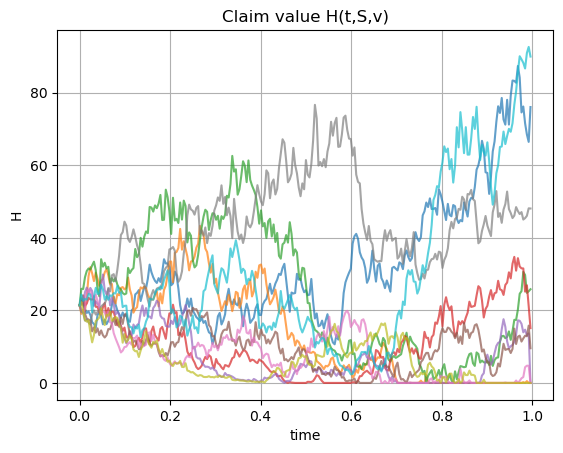

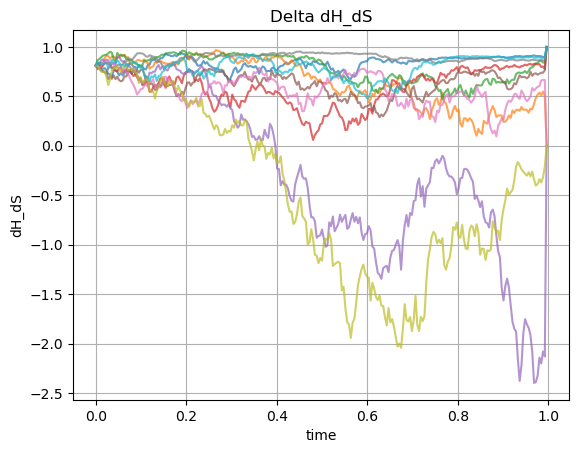

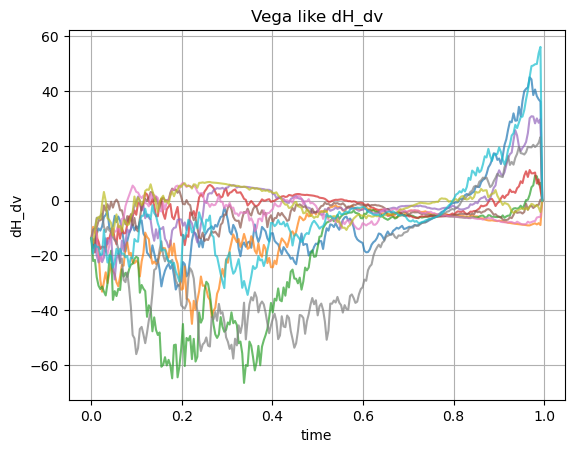

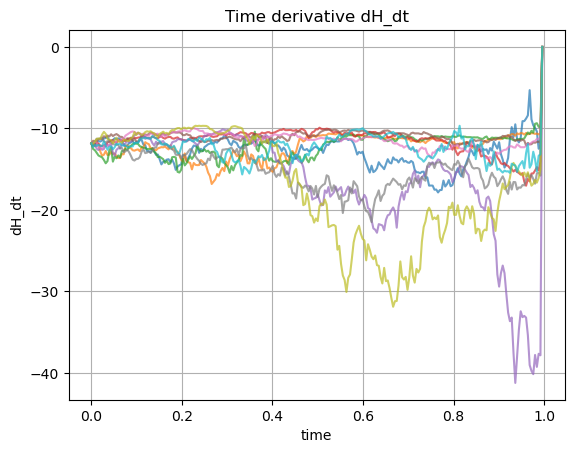

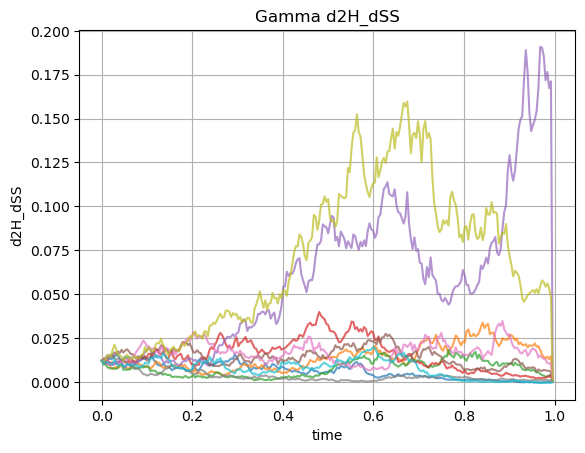

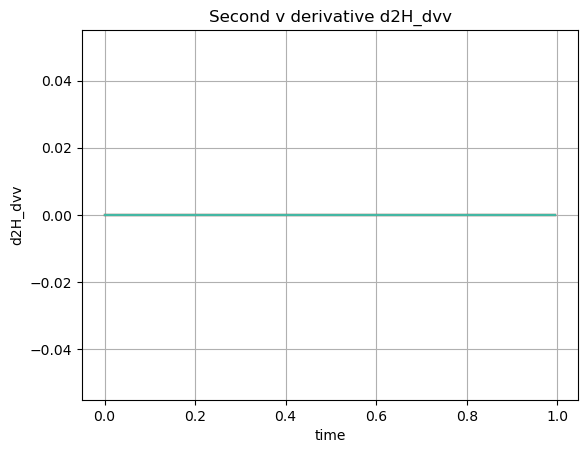

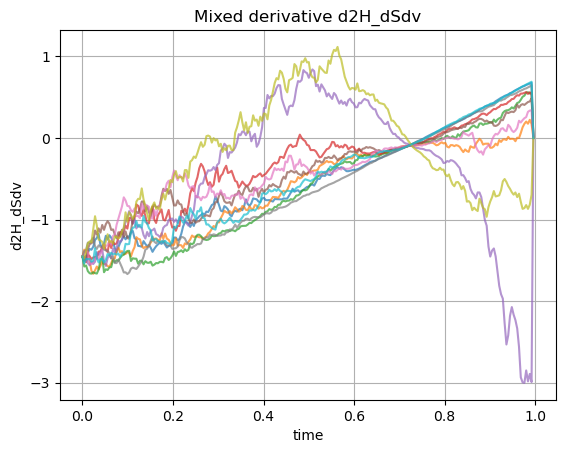

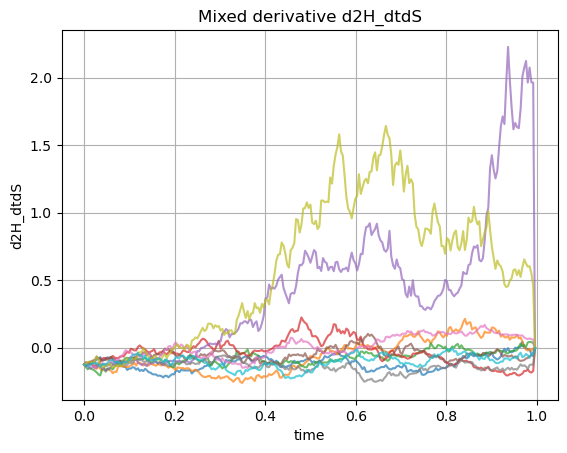

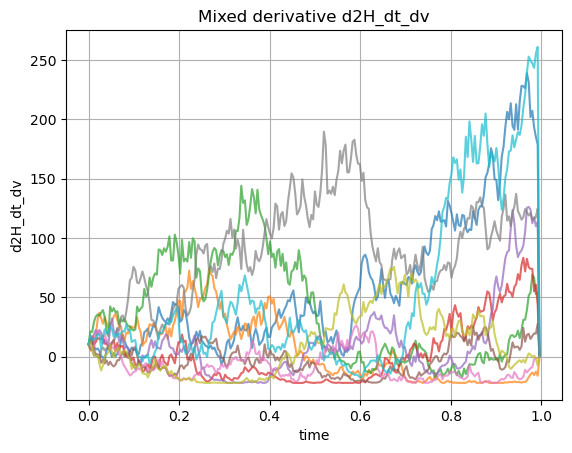

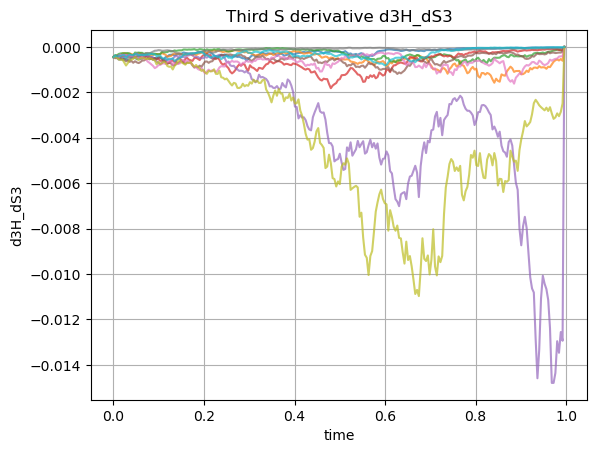

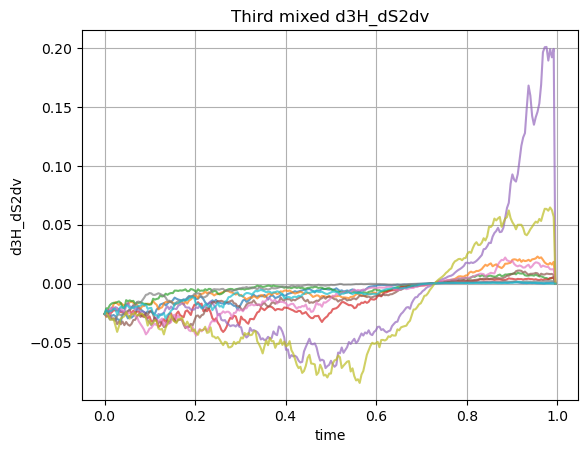

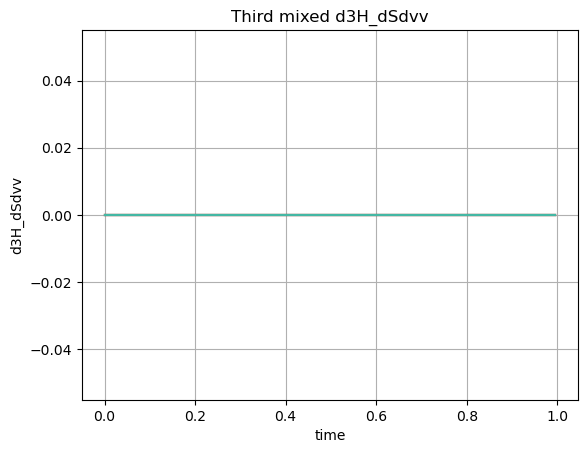

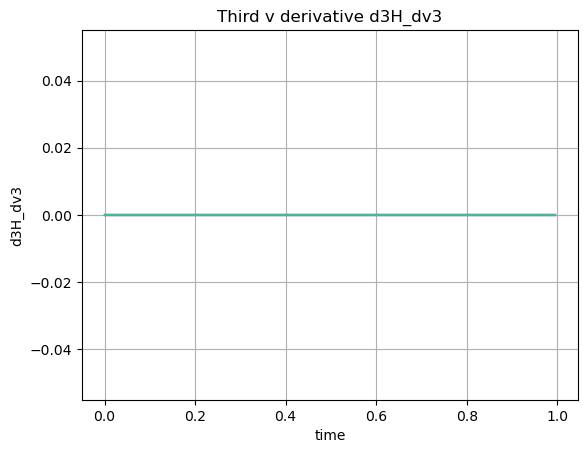

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from OptimalHedging.Heston import HestonSimulator

# === (1) Parameters ===
S0 = 100
mu = 0.05
sigma = 0.2      # usado como v0
kappa = 2.0
theta = 0.2
sigma_v = 0.2
corr = 0.5
t0 = 0.0
T = 1.0
N = 252
M = 1000
K = 100
seed = 123

np.random.seed(seed)

# === (2) Initialize simulator ===
sim = HestonSimulator(
    S0=S0,
    mu=mu,
    sigma=sigma,
    K=K,
    t0=t0,
    T=T,
    N=N,
    M=M,
    seed=seed,
    kappa=kappa,
    theta=theta,
    sigma_v=sigma_v,
    corr=corr
)

# === (3) Simulate S and v ===
S, v = sim.simulate_S()

# === (4) Simulate H and derivatives ===
(H,
 dH_dS, d2H_dSS, dH_dt, d2H_dtdS, d3H_dS3,
 dH_dv, d2H_dvv, d2H_dSdv, d3H_dS2dv, d3H_dSdvv, d3H_dv3,
 d2H_dt_dv) = sim.simulate_H(
    p_t=1,
    p_x=2,
    p_v=1,
    lam_ridge=1e-2
)

# === (5) Time grid ===
t = t0 + sim.dt * np.arange(sim.steps)

# === (6) Plot a few paths for each derivative ===
idx = np.random.choice(M, size=10, replace=False)

def plot_paths(Y, title, ylabel):
    plt.figure()
    for i in idx:
        plt.plot(t, Y[i], alpha=0.7)
    plt.xlabel("time")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# --- main quantities ---
plot_paths(S, "Underlying S paths", "S")
plot_paths(v, "Variance v paths", "v")
plot_paths(H, "Claim value H(t,S,v)", "H")

# --- first derivatives ---
plot_paths(dH_dS, "Delta dH_dS", "dH_dS")
plot_paths(dH_dv, "Vega like dH_dv", "dH_dv")
plot_paths(dH_dt, "Time derivative dH_dt", "dH_dt")

# --- second derivatives ---
plot_paths(d2H_dSS, "Gamma d2H_dSS", "d2H_dSS")
plot_paths(d2H_dvv, "Second v derivative d2H_dvv", "d2H_dvv")
plot_paths(d2H_dSdv, "Mixed derivative d2H_dSdv", "d2H_dSdv")
plot_paths(d2H_dtdS, "Mixed derivative d2H_dtdS", "d2H_dtdS")
plot_paths(d2H_dt_dv, "Mixed derivative d2H_dt_dv", "d2H_dt_dv")

# --- third derivatives ---
plot_paths(d3H_dS3, "Third S derivative d3H_dS3", "d3H_dS3")
plot_paths(d3H_dS2dv, "Third mixed d3H_dS2dv", "d3H_dS2dv")
plot_paths(d3H_dSdvv, "Third mixed d3H_dSdvv", "d3H_dSdvv")
plot_paths(d3H_dv3, "Third v derivative d3H_dv3", "d3H_dv3")
